In [1]:
import xarray as xr
ds = xr.open_dataset('data.nc').sel(expver=1)
ds

<xarray.Dataset> Size: 152MB
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 568B -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude   (latitude) float32 356B 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 4B 1
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float64 51MB ...
    skt        (time, latitude, longitude) float64 51MB ...
    tp         (time, latitude, longitude) float64 51MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

Mean skt over the years

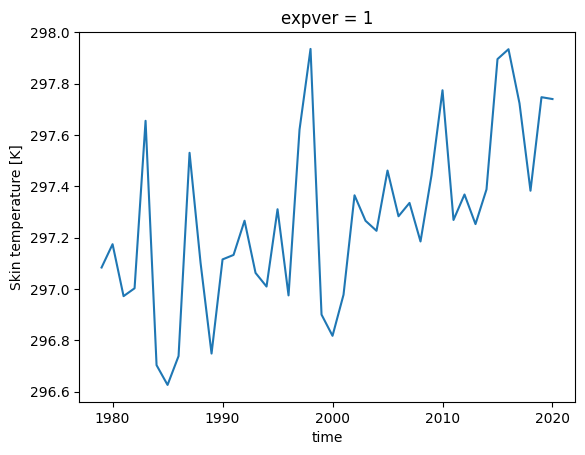

In [2]:
(ds.groupby(ds.time.dt.year)
    .mean(dim=['time', 'latitude', 'longitude'])
    .skt
    .plot())

In [3]:
(ds.groupby(ds.time.dt.year)
    .mean(dim=['time', 'latitude', 'longitude'])
    .skt)

<xarray.DataArray 'skt' (year: 42)> Size: 336B
array([297.08372981, 297.17458317, 296.97220009, 297.00281543,
       297.65519631, 296.7033482 , 296.6264203 , 296.73882046,
       297.53058154, 297.10222363, 296.74858937, 297.11534278,
       297.13271214, 297.26606438, 297.06273475, 297.0096226 ,
       297.31071564, 296.97511523, 297.62092958, 297.93519166,
       296.90035801, 296.81768003, 296.97769325, 297.36506691,
       297.26578283, 297.22669673, 297.46147208, 297.28337317,
       297.33541064, 297.18517267, 297.44299252, 297.77424243,
       297.26893467, 297.36815097, 297.25286435, 297.38799084,
       297.89557538, 297.93406053, 297.72334718, 297.38282372,
       297.74722532, 297.73997396])
Coordinates:
    expver   int32 4B 1
  * year     (year) int64 336B 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
Attributes:
    units:      K
    long_name:  Skin temperature

Mean skt over the months

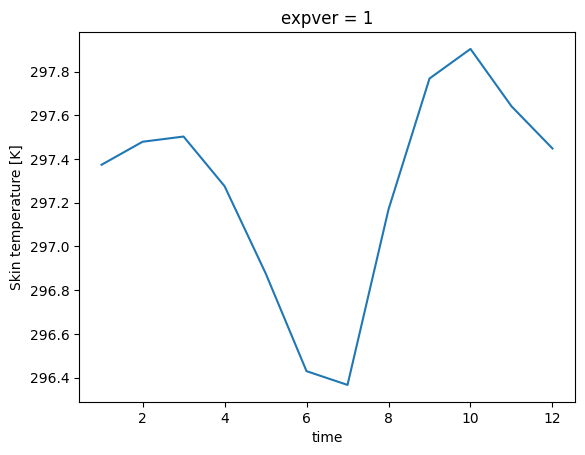

In [4]:
(ds.groupby(ds.time.dt.month)
    .mean(dim=['time', 'latitude', 'longitude'])
    .skt
    .plot())

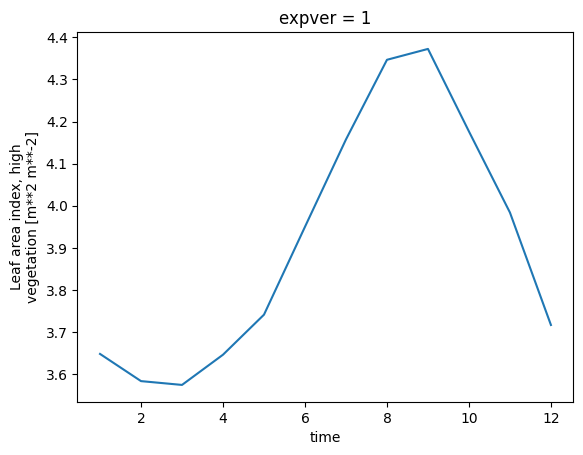

In [5]:
(ds.groupby(ds.time.dt.month)
    .mean(dim=['time', 'latitude', 'longitude'])
    .lai_hv
    .plot())

c:\Users\omkar\Desktop\xarray\.venv\lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


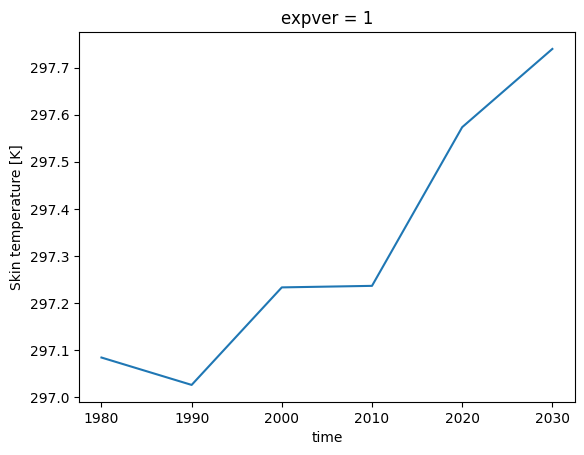

In [8]:
(ds.resample({'time':'10y'})
    .mean(dim=['time', 'longitude', 'latitude'])
    .skt
    .plot())